In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
# auto-arima model
from pmdarima.arima import auto_arima

In [5]:
ts1 = pd.date_range('2021-01-01', '2021-12-01', freq='D')
print(ts1)

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2021-11-22', '2021-11-23', '2021-11-24', '2021-11-25',
               '2021-11-26', '2021-11-27', '2021-11-28', '2021-11-29',
               '2021-11-30', '2021-12-01'],
              dtype='datetime64[ns]', length=335, freq='D')


In [4]:
ts2 = pd.date_range('2021-01-01', '2021-12-01', freq='W')
print(ts2)

DatetimeIndex(['2021-01-03', '2021-01-10', '2021-01-17', '2021-01-24',
               '2021-01-31', '2021-02-07', '2021-02-14', '2021-02-21',
               '2021-02-28', '2021-03-07', '2021-03-14', '2021-03-21',
               '2021-03-28', '2021-04-04', '2021-04-11', '2021-04-18',
               '2021-04-25', '2021-05-02', '2021-05-09', '2021-05-16',
               '2021-05-23', '2021-05-30', '2021-06-06', '2021-06-13',
               '2021-06-20', '2021-06-27', '2021-07-04', '2021-07-11',
               '2021-07-18', '2021-07-25', '2021-08-01', '2021-08-08',
               '2021-08-15', '2021-08-22', '2021-08-29', '2021-09-05',
               '2021-09-12', '2021-09-19', '2021-09-26', '2021-10-03',
               '2021-10-10', '2021-10-17', '2021-10-24', '2021-10-31',
               '2021-11-07', '2021-11-14', '2021-11-21', '2021-11-28'],
              dtype='datetime64[ns]', freq='W-SUN')


In [6]:
ts3 = pd.date_range('2021-01-01', '2021-12-01', freq='MS')
print(ts3)

DatetimeIndex(['2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01'],
              dtype='datetime64[ns]', freq='MS')


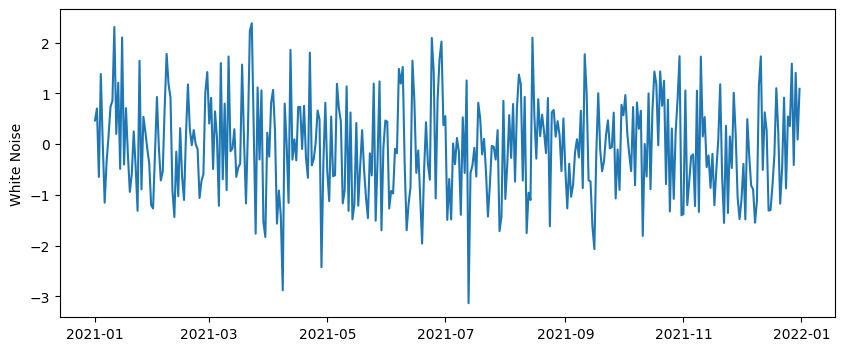

In [9]:
df = pd.DataFrame({'Date': pd.date_range('2021-01-01', '2021-12-31', freq='D')
,
 'Noise': [random.gauss(0, 1) for i in range(365)]})
plt.figure(figsize=(10, 4))
plt.plot(df['Date'], df['Noise'])
plt.ylabel('White Noise')
plt.show()

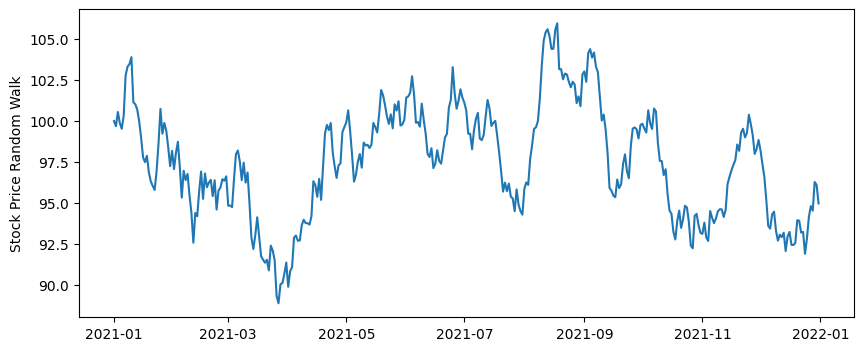

In [10]:
df = pd.DataFrame({'Date': pd.date_range('2021-01-01', '2021-12-31', freq='D')
,
 'Noise': [100]+[random.gauss(0, 1) for i in range(364)]})
df['Stock'] = df['Noise'].cumsum()
plt.figure(figsize=(10, 4))
plt.plot(df['Date'], df['Stock'])
plt.ylabel('Stock Price Random Walk')
plt.show()

In [14]:
# load the dataset
df = pd.read_csv('BikeSharing.csv')
df['dteday'] = pd.to_datetime(df['dteday'])
df.set_index('dteday', inplace=True)
# insight 1: compute the montly average temperature
monthly_temp = df.resample('M')[['temp']].mean()
# insight 2: compute the daily sum of casual, register and total rentals
daily_rental = df.resample('D')[['casual', 'registered', 'cnt']].sum()
# insight 3: compute the monthly sum of total rentals in different weathers
monthly_rental_weather = df.groupby([pd.Grouper(freq='M'), 'weather'])[['cnt']
].sum()
# insight 4: what is the peak hours of bike rental for casual users and registered users, respectively?
df['hour'] = df.index.hour
peak_reg = df.groupby('hour')[['registered']].mean().sort_values('registered',
ascending=False)
peak_cas = df.groupby('hour')[['casual']].mean().sort_values('casual', ascending=False)

In [15]:
# load the two datasets
df1 = pd.read_csv('daily-total-female-births.csv')
df2 = pd.read_csv('AirPassengers.csv')
df1['Date'] = pd.to_datetime(df1['Date'])
df2['Month'] = pd.to_datetime(df2['Month'])
df1.set_index('Date', inplace=True)
df2.set_index('Month', inplace=True)

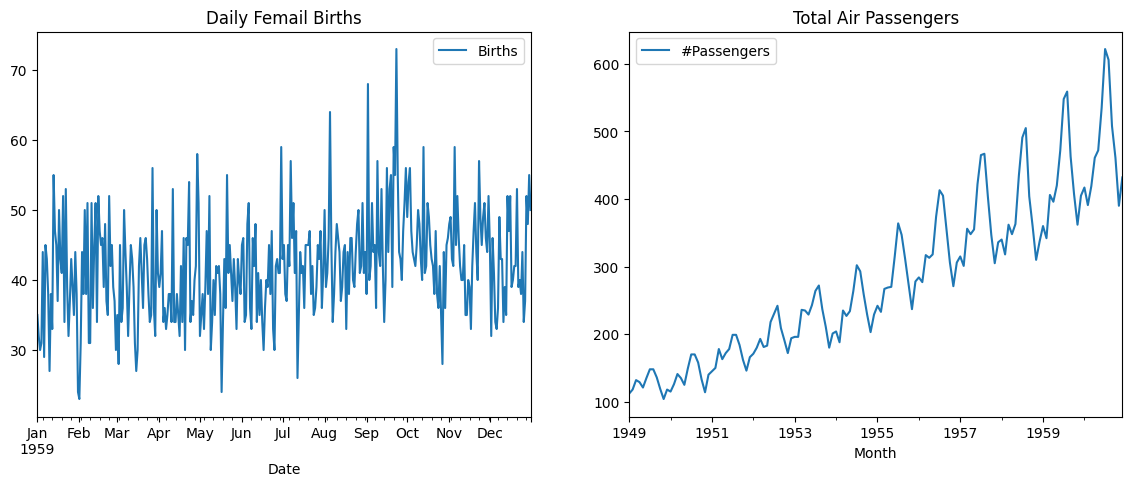

In [16]:
# Visual Check
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
df1.plot(ax=ax[0])
df2.plot(ax=ax[1])
ax[0].set_title('Daily Femail Births')
ax[1].set_title('Total Air Passengers')
plt.show()

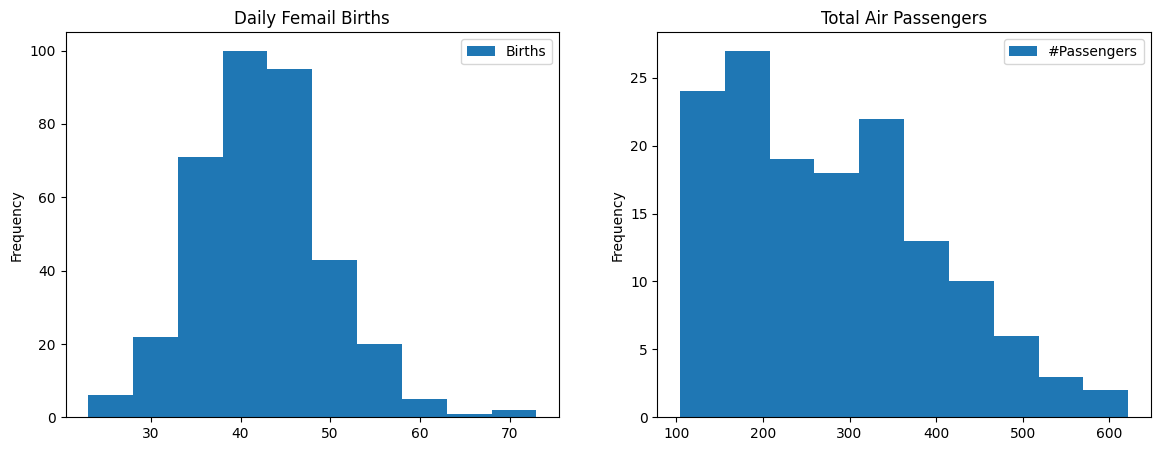

In [17]:
# Summary Statistics
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
df1.plot(ax=ax[0], kind='hist')
df2.plot(ax=ax[1], kind='hist')
ax[0].set_title('Daily Femail Births')
ax[1].set_title('Total Air Passengers')
plt.show()

In [19]:
# Summary Statistics
X1 = df1.iloc[:len(df1)//2, 0]
X2 = df1.iloc[len(df1)//2:, 0]
print(f'For Female Birth Dataset, group 1 mean = {X1.mean():.2f}, group 2 mean = {X1.mean():.2f}, \ngroup 1 variance = {X1.var():.2f}, group 2 variance = {X2.var():.2f}')
print()
X3 = df2.iloc[:len(df2)//2, 0]
X4 = df2.iloc[len(df2)//2:, 0]
print(f'For Air Passenger Dataset, group 1 mean = {X3.mean():.2f}, group 2 mean = {X4.mean():.2f}, \ngroup 1 variance = {X3.var():.2f}, group 2 variance = {X4.var():.2f}')

For Female Birth Dataset, group 1 mean = 39.76, group 2 mean = 39.76, 
group 1 variance = 49.49, group 2 variance = 48.98

For Air Passenger Dataset, group 1 mean = 182.90, group 2 mean = 377.69, 
group 1 variance = 2275.69, group 2 variance = 7471.74


In [20]:
# Augmented Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller
result1 = adfuller(df1['Births'])
result2 = adfuller(df2['#Passengers'])
print('Female Birth Dataset p-value: %f' % result1[1])
print('Air Passenger Dataset p-value: %f' % result2[1])

Female Birth Dataset p-value: 0.000052
Air Passenger Dataset p-value: 0.991880


Air Paseenger before differencing p-value: 0.991880
Air Paseenger after differencing p-value: 0.000000


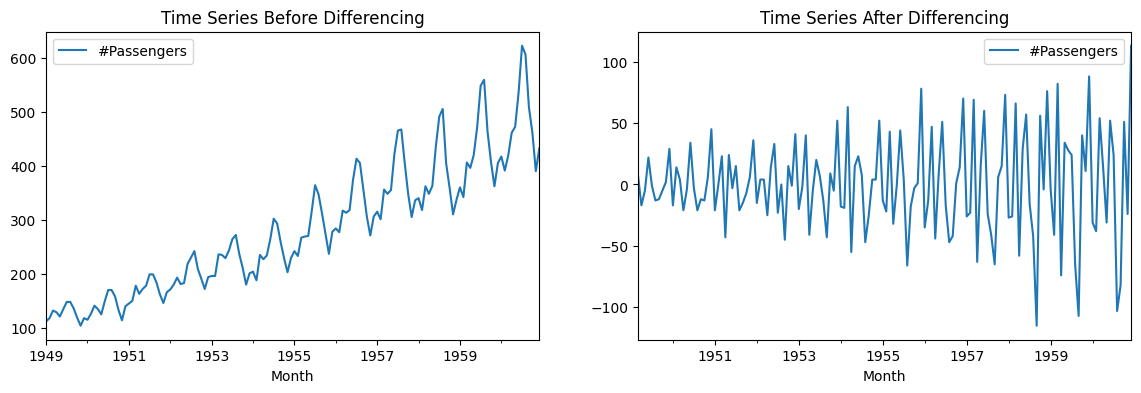

In [22]:
from statsmodels.tsa.statespace.tools import diff
from statsmodels.tsa.stattools import adfuller
df = pd.read_csv('airpassengers.csv')
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)
# perform differencing operation
df_diff = diff(df, k_diff=2)
result1 = adfuller(df)
result2 = adfuller(df_diff)
print('Air Paseenger before differencing p-value: %f' % result1[1])
print('Air Paseenger after differencing p-value: %f' % result2[1])
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
df.plot(ax=ax[0])
df_diff.plot(ax=ax[1])
ax[0].set_title('Time Series Before Differencing')
ax[1].set_title('Time Series After Differencing')
plt.show()

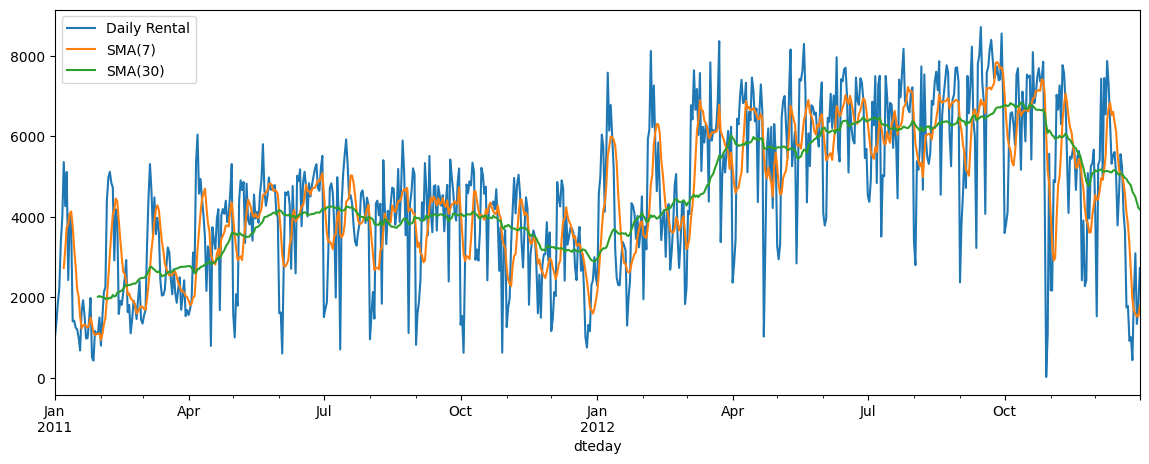

In [24]:
df = pd.read_csv('bikesharing.csv')
df['dteday'] = pd.to_datetime(df['dteday'])
df.set_index('dteday', inplace=True)
daily_rental = df.resample('D')[['cnt']].sum()
ax = daily_rental.plot(figsize=(14, 5))
daily_rental.rolling(window=7).mean().plot(ax=ax)
daily_rental.rolling(window=30).mean().plot(ax=ax)
ax.legend(labels=['Daily Rental', 'SMA(7)', 'SMA(30)'])
plt.show()

In [28]:
# load the dataset
df = pd.read_csv('bikesharing.csv')
df['dteday'] = pd.to_datetime(df['dteday'])
df.set_index('dteday', inplace=True)
# group and calculate daily rental
daily_rental = df.resample('D')[['cnt']].sum()
# define training and testing dataset
train_data = daily_rental[daily_rental.index<'2012-11']
test_data = daily_rental[daily_rental.index>='2012-11']

c:\Users\ianli_gu6oysd\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


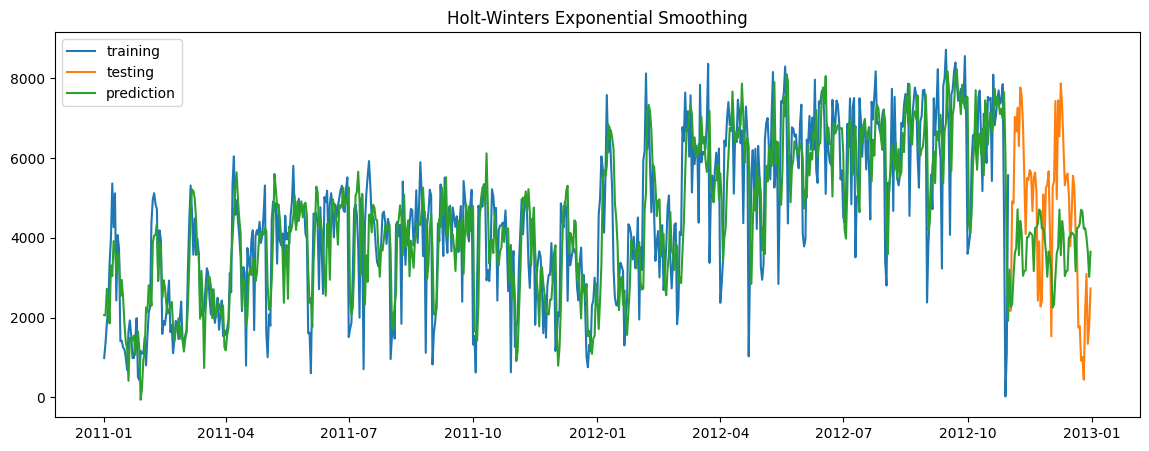

In [29]:
# Exponential Smoothing Model
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES
from sklearn.metrics import mean_absolute_percentage_error
es_model = HWES(train_data, seasonal_periods=31, trend='add', seasonal='add',
 damped_trend=True, freq='D').fit()
pred1 = es_model.predict(start='2011-01-01', end='2012-12-31')
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(train_data, label='training')
ax.plot(test_data, label='testing')
ax.plot(pred1, label='prediction')
plt.legend()
plt.title('Holt-Winters Exponential Smoothing')
plt.show()

In [27]:
# Evaluation
from sklearn.metrics import mean_absolute_percentage_error
mape_train = mean_absolute_percentage_error(train_data, pred1[pred1.index<'2012-11'])
mape_test = mean_absolute_percentage_error(test_data, pred1[pred1.index>='2012-11'])
print(f'Model Mean Absolute Percentage Error on training data is {mape_train*100:.2f}%'
)
print(f'Model Mean Absolute Percentage Error on testing data is {mape_test*100:.2f}%')

Model Mean Absolute Percentage Error on training data is 71.77%
Model Mean Absolute Percentage Error on testing data is 69.50%


In [36]:
# load the dataset
df = pd.read_csv('bikesharing.csv')
df['dteday'] = pd.to_datetime(df['dteday'])
df.set_index('dteday', inplace=True)
# group and calculate daily rental
daily_rental = df.resample('D')[['cnt']].sum()
# define training dataset
train_data = daily_rental[daily_rental.index<'2012-11']
test_data = daily_rental[daily_rental.index>='2012-11']

c:\Users\ianli_gu6oysd\AppData\Local\Programs\Python\Python310\lib\site-packages\pmdarima\arima\_validation.py:76: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  warnings.warn('stepwise model cannot be fit in parallel (n_jobs=%i). '


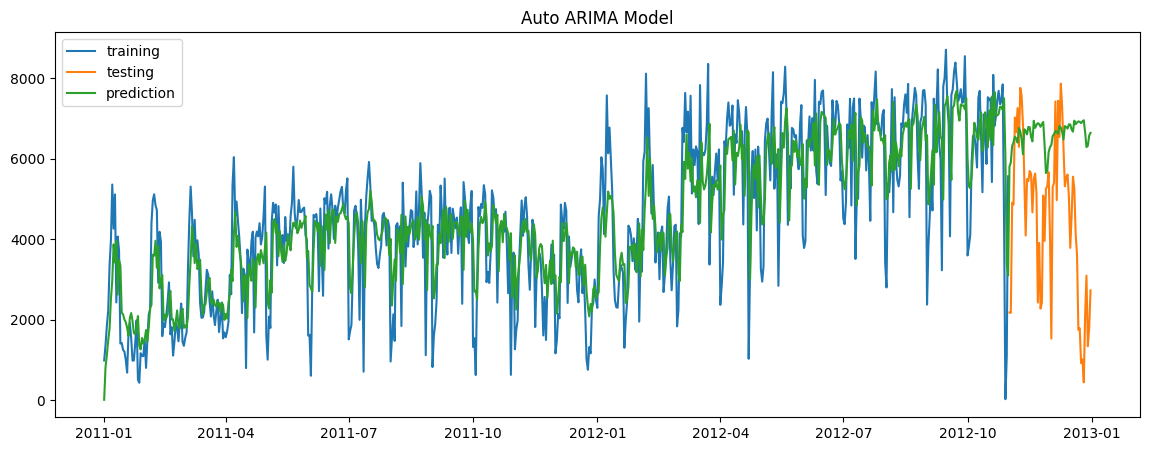

In [37]:

arima_model = auto_arima(train_data, seasonal=True, m=30, n_jobs=-1)
# use the model to make predictions
pred_in_sample = arima_model.predict_in_sample()
pred_out_sample = arima_model.predict(n_periods=61)
pred_full = np.concatenate((pred_in_sample, pred_out_sample))
# Plot the results
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(train_data, label='training')
ax.plot(test_data, label='testing')
ax.plot(daily_rental.index, pred_full, label='prediction')
plt.legend()
plt.title('Auto ARIMA Model')
plt.show()


In [39]:
# To evaluate the auto arima model
from sklearn.metrics import mean_absolute_percentage_error
mape_train = mean_absolute_percentage_error(train_data, pred_in_sample)
mape_test = mean_absolute_percentage_error(test_data, pred_out_sample)
print(f'Model Mean Absolute Percentage Error on training data is {mape_train*100:.2f}%')
print(f'Model Mean Absolute Percentage Error on testing data is {mape_test*100:.2f}%')

Model Mean Absolute Percentage Error on training data is 71.00%
Model Mean Absolute Percentage Error on testing data is 112.31%


In [40]:
# load the dataset
df = pd.read_csv('bikesharing.csv')
df['dteday'] = pd.to_datetime(df['dteday'])
df.set_index('dteday', inplace=True)
# group and calculate daily rental
daily_rental = df.resample('D')[['cnt']].sum()
# define training dataset
train_data = daily_rental[daily_rental.index<'2012-11']
test_data = daily_rental[daily_rental.index>='2012-11']


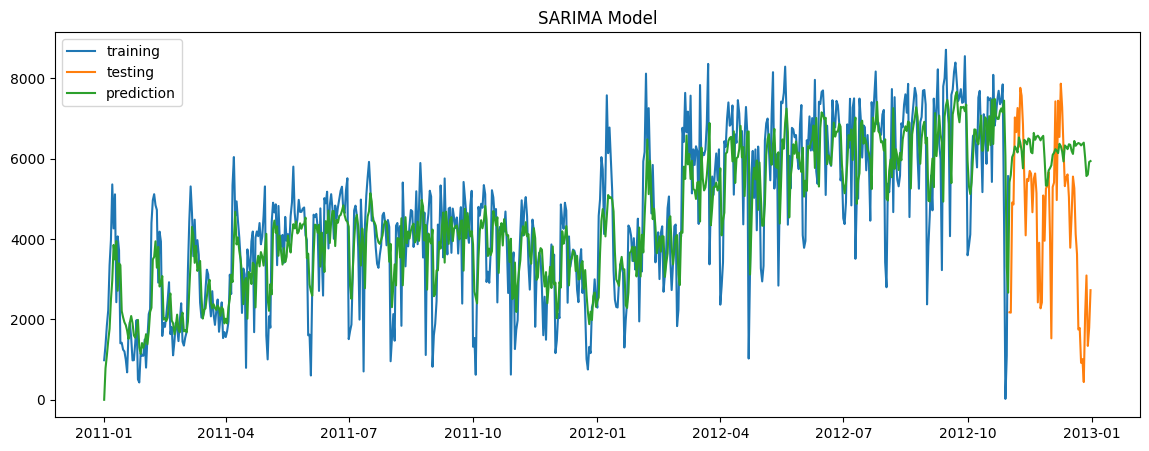

In [42]:
# SARIMAX modeel
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarima_model = SARIMAX(train_data, order=(2,1,1),seasonal_order=(2,0,1,30)).fit()
pred = sarima_model.get_prediction(start='2011-01-01', end='2012-12-31').predicted_mean
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(train_data, label='training')
ax.plot(test_data, label='testing')
ax.plot(pred, label='prediction')
plt.legend()
plt.title('SARIMA Model')
plt.show()

In [44]:
# To evaluate the auto arima model
from sklearn.metrics import mean_absolute_percentage_error
mape_train = mean_absolute_percentage_error(train_data, pred[pred.index<'2012-11'])
mape_test = mean_absolute_percentage_error(test_data, pred[pred.index>='2012-11'])
print(f'Model Mean Absolute Percentage Error on training data is {mape_train*100:.2f}%')
print(f'Model Mean Absolute Percentage Error on testing data is {mape_test*100:.2f}%')

Model Mean Absolute Percentage Error on training data is 70.57%
Model Mean Absolute Percentage Error on testing data is 99.24%
